In [2]:
! pip install squarify

In [0]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib

# package for creating plots
import matplotlib.pyplot as plt 

# package for making plots with seaborn
import seaborn as sns 
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

import plotly.tools as tls
import squarify

# from mpl_toolkits.basemap import Basemap
from numpy import array
from matplotlib import cm

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

import plotly
plotly.tools.set_credentials_file(username='zhu.maxwell', api_key='ToIz4azRkvGnZAWDMSE1')

import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [0]:
# Code to read csv file into colaboratory and authenticate and create the PyDrive client.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading files from my Google Drive
downloaded = drive.CreateFile({'id':'1yud5FcoI1rz9p58mWqyRJ-AwIc6lFw6r'}) # Kiva Loans 
downloaded.GetContentFile('kiva_loans.csv')  
k_loans_df = pd.read_csv('kiva_loans.csv') 

downloaded = drive.CreateFile({'id':'1-u-5aOxMXWyedwDnLDvmxmrSbpPXgK6z'}) # Kiva MPI Locations 
downloaded.GetContentFile('kiva_mpi_region_locations.csv')  
k_mpi_locations_df = pd.read_csv('kiva_mpi_region_locations.csv') 

downloaded = drive.CreateFile({'id':'1tE5U1Fd73pLZfq--MY-8QaLW4nqME6mP'}) # Loan Theme IDs
downloaded.GetContentFile('loan_theme_ids.csv')  
loan_theme_ids_df = pd.read_csv('loan_theme_ids.csv') 

downloaded = drive.CreateFile({'id':'1kA_0OWKbTFLqa0J82vg4sR8sMg4WBDGP'}) # Loan Theme by Region
downloaded.GetContentFile('loan_themes_by_region.csv')  
loan_themes_by_region_df = pd.read_csv('loan_themes_by_region.csv') 


In [7]:
downloaded = drive.CreateFile({'id':'1EzKFAs11-Vqn1BB9x4t7Oc4ypYlsFmh6'}) # World Population pulled on 5/1/2018
downloaded.GetContentFile('world_pop.csv')  
world_pop_data = pd.read_csv('world_pop.csv') 
world_pop_data.head(5)

Rank    country  2018_Population  Yearly_Change  Net_Change  Density  \
0     1      China       1415045928         0.0039     5528531      151   
1     2      India       1354051854         0.0111    14871727      455   
2     3       U.S.        326766748         0.0071     2307285       36   
3     4  Indonesia        266794980         0.0106     2803601      147   
4     5     Brazil        210867954         0.0075     1579676       25   

   Land Area  Migrants  Fert_Rate  Med_Age  Urban_Pop_Percent  World_Share  
0    9388211 -339690.0        1.6     37.0               0.58       0.1854  
1    2973190 -515643.0        2.4     27.0               0.32       0.1774  
2    9147420  900000.0        1.9     38.0               0.83       0.0428  
3    1811570 -167000.0        2.5     28.0               0.54       0.0350  
4    8358140    3185.0        1.8     31.0               0.84       0.0276

In [0]:
# Additional snapshots from http://s3.kiva.org/snapshots/kiva_ds_csv.zip (http://build.kiva.org/docs/data/snapshots)
downloaded = drive.CreateFile({'id': '16aygILm2yy_9kNyejrDVVHcIAfzBl9qR'}) # Loans Lenders
downloaded.GetContentFile('loans_lenders.csv')
loans_lenders_df = pd.read_csv('loans_lenders.csv')

In [0]:
# Additional snapshots from http://s3.kiva.org/snapshots/kiva_ds_csv.zip (http://build.kiva.org/docs/data/snapshots)
#downloaded = drive.CreateFile({'id': '1VyLV-uSGacf1jSPHRHpnvZPIa7RvRY9k'}) # Loans
#downloaded.GetContentFile('loans.csv')
#loans_df = pd.read_csv('loans.csv')

In [0]:
# Additional snapshots from http://s3.kiva.org/snapshots/kiva_ds_csv.zip (http://build.kiva.org/docs/data/snapshots)
downloaded = drive.CreateFile({'id': '1JSekH_yy1fgDopTVq_nduljh_CQDDrh7'}) # Lenders
downloaded.GetContentFile('lenders.csv')
lenders_df = pd.read_csv('lenders.csv')

In [11]:
k_loans_df.head(5)

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  partner_id                posted_time  \
0        Lahore      PKR       247.0  2014-01-01 06:12:39+00:00   
1        Lahore      PKR       247.0  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR       334.0  2014-01-01 09:58:07+00:00   
3        Lahore      PKR       247.0  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR       245.0  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time  term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00            12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00            11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00            43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00            11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00            14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date  
0          irregular  2014-01-01  
1          irregular  2014-01-01  
2             bullet  2014-01-01  
3          irregular  2014-01-01  
4            monthly  2014-01-01

In [12]:
k_mpi_locations_df.head(5)

LocationName  ISO      country      region world_region    MPI  \
0  Badakhshan, Afghanistan  AFG  Afghanistan  Badakhshan   South Asia  0.387   
1     Badghis, Afghanistan  AFG  Afghanistan     Badghis   South Asia  0.466   
2     Baghlan, Afghanistan  AFG  Afghanistan     Baghlan   South Asia  0.300   
3       Balkh, Afghanistan  AFG  Afghanistan       Balkh   South Asia  0.301   
4      Bamyan, Afghanistan  AFG  Afghanistan      Bamyan   South Asia  0.325   

                               geo        lat        lon  
0  (36.7347725, 70.81199529999999)  36.734772  70.811995  
1         (35.1671339, 63.7695384)  35.167134  63.769538  
2         (35.8042947, 69.2877535)  35.804295  69.287754  
3         (36.7550603, 66.8975372)  36.755060  66.897537  
4         (34.8100067, 67.8212104)  34.810007  67.821210

In [13]:
loan_theme_ids_df.head(5)

id    Loan Theme ID          Loan Theme Type  Partner ID
0  638631  a1050000000skGl                  General       151.0
1  640322  a1050000000skGl                  General       151.0
2  641006  a1050000002X1ij         Higher Education       160.0
3  641019  a1050000002X1ij         Higher Education       160.0
4  641594  a1050000002VbsW  Subsistence Agriculture       336.0

In [14]:
loan_themes_by_region_df.head(5)

Partner ID               Field Partner Name                       sector  \
0           9  KREDIT Microfinance Institution  General Financial Inclusion   
1           9  KREDIT Microfinance Institution  General Financial Inclusion   
2           9  KREDIT Microfinance Institution  General Financial Inclusion   
3           9  KREDIT Microfinance Institution  General Financial Inclusion   
4           9  KREDIT Microfinance Institution  General Financial Inclusion   

     Loan Theme ID         Loan Theme Type   country forkiva  \
0  a1050000000slfi        Higher Education  Cambodia      No   
1  a10500000068jPe  Vulnerable Populations  Cambodia      No   
2  a1050000000slfi        Higher Education  Cambodia      No   
3  a10500000068jPe  Vulnerable Populations  Cambodia      No   
4  a1050000002X1Uu              Sanitation  Cambodia      No   

                  region     geocode_old  ISO    ...     amount  \
0       Banteay Meanchey  (13.75, 103.0)  KHM    ...        450   
1    Battambang Province             NaN  KHM    ...      20275   
2    Battambang Province             NaN  KHM    ...       9150   
3  Kampong Cham Province   (12.0, 105.5)  KHM    ...     604950   
4  Kampong Cham Province   (12.0, 105.5)  KHM    ...        275   

                      LocationName                      geocode  \
0       Banteay Meanchey, Cambodia  [(13.6672596, 102.8975098)]   
1    Battambang Province, Cambodia   [(13.0286971, 102.989615)]   
2    Battambang Province, Cambodia   [(13.0286971, 102.989615)]   
3  Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   
4  Kampong Cham Province, Cambodia  [(12.0982918, 105.3131185)]   

                                 names                        geo        lat  \
0  Banteay Meanchey Province; Cambodia  (13.6672596, 102.8975098)  13.667260   
1        Battambang Province; Cambodia   (13.0286971, 102.989615)  13.028697   
2        Battambang Province; Cambodia   (13.0286971, 102.989615)  13.028697   
3      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   
4      Kampong Cham Province; Cambodia  (12.0982918, 105.3131185)  12.098292   

          lon                   mpi_region                    mpi_geo  \
0  102.897510  Banteay Mean Chey, Cambodia  (13.6672596, 102.8975098)   
1  102.989615  Banteay Mean Chey, Cambodia  (13.6672596, 102.8975098)   
2  102.989615  Banteay Mean Chey, Cambodia  (13.6672596, 102.8975098)   
3  105.313119       Kampong Cham, Cambodia  (11.9924294, 105.4645408)   
4  105.313119       Kampong Cham, Cambodia  (11.9924294, 105.4645408)   

  rural_pct  
0      90.0  
1      90.0  
2      90.0  
3      90.0  
4      90.0  

[5 rows x 21 columns]

In [15]:
loans_lenders_df.head(5)

loan_id                                         lender_ids
0    59106  karen3043, alfredo9756, karen1137, mark3485, w...
1   450821  karen3043, elliott9385, goathork, anuzis, jeff...
2     2001  scottbeard, markwilliamson, karen4553, jon7411...
3   164374  melandpaul4217, steven1066, scott9336, larry28...
4    25214  alan4525, eric4543, claudette2804, ccchs, shaw...

In [16]:
# Retrieve loan amount per country data
k_loan_country_df = k_loans_df[['id', 'country']].groupby(['country'])['id'].agg({'loan_amount': ['sum','count']}).reset_index()
k_loan_country_df.columns = k_loan_country_df.columns.droplevel()
k_loan_country_df.columns = ['country', 'loan_amount', 'loan_count']
k_loan_country_df.head(5)

country  loan_amount  loan_count
0  Afghanistan      1829155           2
1      Albania   1830338247        1934
2      Armenia   8556397388        8631
3   Azerbaijan   1643367209        1945
4       Belize     98385757         125

In [18]:
k_loan_pop_country_df = pd.merge(world_pop_data, k_loan_country_df, on='country')
k_loan_pop_country_df.head(5)

Rank    country  2018_Population  Yearly_Change  Net_Change  Density  \
0     1      China       1415045928         0.0039     5528531      151   
1     2      India       1354051854         0.0111    14871727      455   
2     4  Indonesia        266794980         0.0106     2803601      147   
3     5     Brazil        210867954         0.0075     1579676       25   
4     6   Pakistan        200813818         0.0193     3797863      260   

   Land Area  Migrants  Fert_Rate  Med_Age  Urban_Pop_Percent  World_Share  \
0    9388211 -339690.0        1.6     37.0               0.58       0.1854   
1    2973190 -515643.0        2.4     27.0               0.32       0.1774   
2    1811570 -167000.0        2.5     28.0               0.54       0.0350   
3    8358140    3185.0        1.8     31.0               0.84       0.0276   
4     770880 -236384.0        3.7     22.0               0.38       0.0263   

   loan_amount  loan_count  
0    132492085         134  
1  11347970542       11237  
2   6191521379        6214  
3    307931852         284  
4  27349331723       26857

In [19]:
# Adjusting loans by calculating values per million population (Dividing the loan count by population and then dividing that by a million)
k_loan_pop_country_df['loans_per_million'] = (k_loan_pop_country_df['loan_count'] / (k_loan_pop_country_df['2018_Population']) / 1000000)
k_loan_pop_country_df['loan_amount_per_million'] = (k_loan_pop_country_df['loan_amount'] / (k_loan_pop_country_df['2018_Population']) / 1000000)
k_loan_pop_country_df['loans_per_billion'] = (k_loan_pop_country_df['loan_count'] / (k_loan_pop_country_df['2018_Population']) / 1000000000)
k_loan_pop_country_df['loan_amount_per_billion'] = (k_loan_pop_country_df['loan_amount'] / (k_loan_pop_country_df['2018_Population']) / 1000000000)
k_loan_pop_country_df.head(5)

Rank    country  2018_Population  Yearly_Change  Net_Change  Density  \
0     1      China       1415045928         0.0039     5528531      151   
1     2      India       1354051854         0.0111    14871727      455   
2     4  Indonesia        266794980         0.0106     2803601      147   
3     5     Brazil        210867954         0.0075     1579676       25   
4     6   Pakistan        200813818         0.0193     3797863      260   

   Land Area  Migrants  Fert_Rate  Med_Age  Urban_Pop_Percent  World_Share  \
0    9388211 -339690.0        1.6     37.0               0.58       0.1854   
1    2973190 -515643.0        2.4     27.0               0.32       0.1774   
2    1811570 -167000.0        2.5     28.0               0.54       0.0350   
3    8358140    3185.0        1.8     31.0               0.84       0.0276   
4     770880 -236384.0        3.7     22.0               0.38       0.0263   

   loan_amount  loan_count  loans_per_million  loan_amount_per_million  \
0    132492085         134       9.469657e-14             9.363094e-08   
1  11347970542       11237       8.298796e-12             8.380750e-06   
2   6191521379        6214       2.329129e-11             2.320704e-05   
3    307931852         284       1.346814e-12             1.460307e-06   
4  27349331723       26857       1.337408e-10             1.361925e-04   

   loans_per_billion  loan_amount_per_billion  
0       9.469657e-17             9.363094e-11  
1       8.298796e-15             8.380750e-09  
2       2.329129e-14             2.320704e-08  
3       1.346814e-15             1.460307e-09  
4       1.337408e-13             1.361925e-07

Text(0.5,1,'Kiva Loans Across Top 20 Frequent Countries')

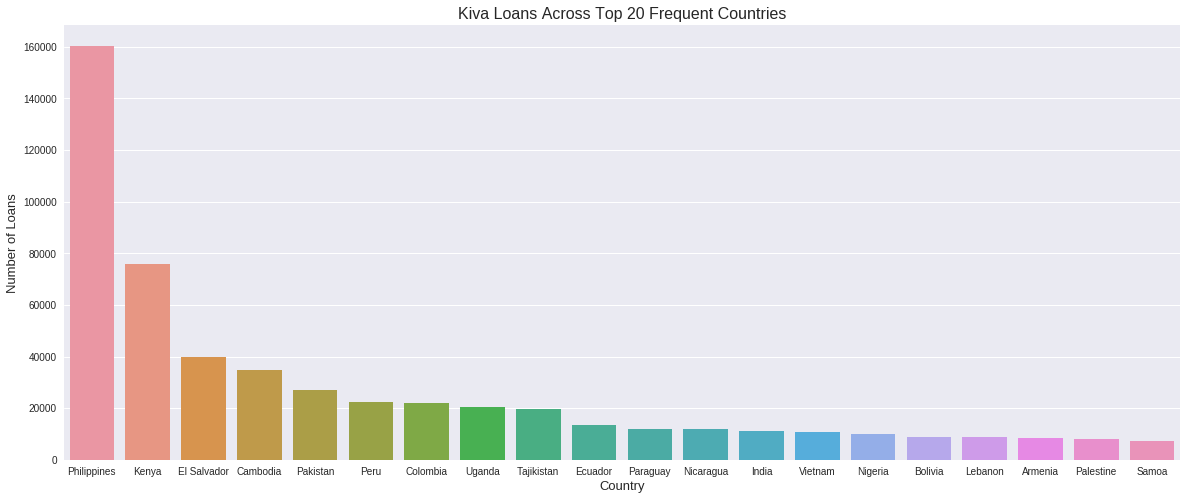

In [21]:
plt.figure(figsize=(20,8))
count = k_loans_df['country'].value_counts().head(20)

sns.barplot(count.index, count.values)

plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of Loans', fontsize=13)
plt.title("KIVA Loans Across Top 20 Frequent Countries", fontsize=16)

Text(0.5,1,'Top 20 Countries with Largest Kiva Loans')

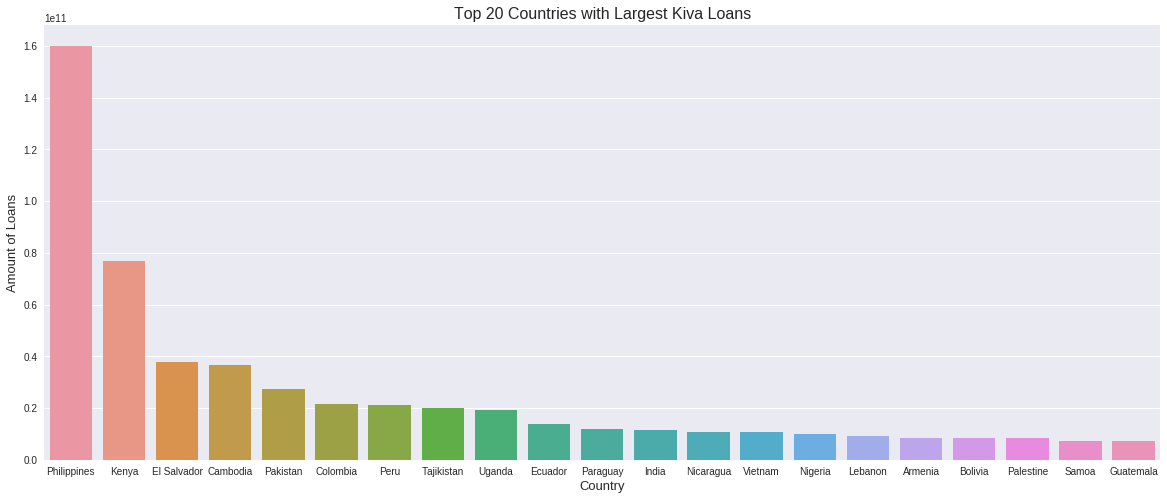

In [86]:
plt.figure(figsize=(20,8))
top_k_loan_country_df = k_loan_country_df.query('loan_amount > 7000000000')
top_k_loan_country_df.sort_values('loan_amount', ascending=False, inplace=True)

sns.barplot(top_k_loan_country_df.country, top_k_loan_country_df.loan_amount)

plt.xlabel('Country', fontsize=13)
plt.ylabel('Amount of Loans', fontsize=13)
plt.title("Top 20 Countries with Largest KIVA Loans", fontsize=16)

Text(0.5,1,'Number of Loans per Country adjusted by Population')

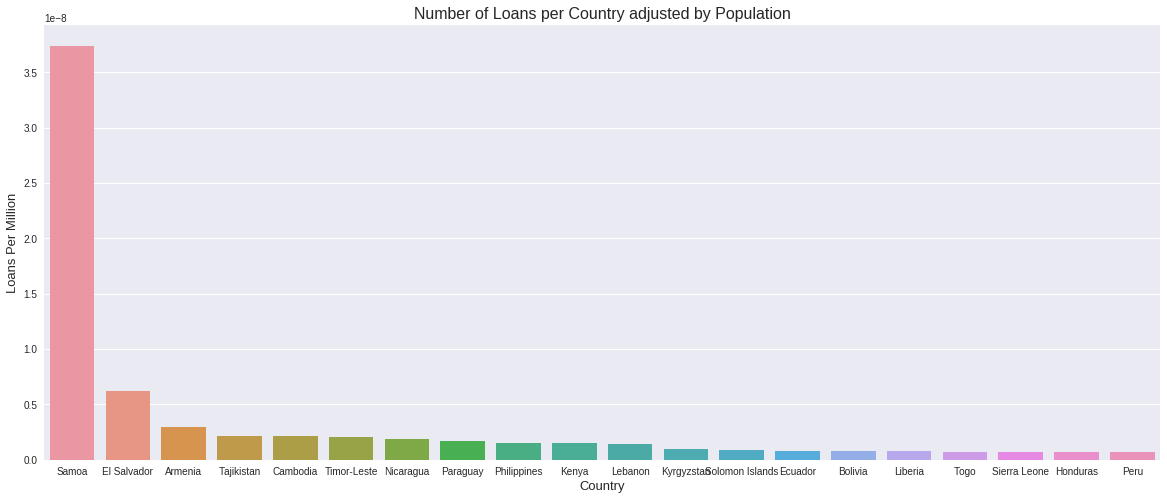

In [87]:
plt.figure(figsize=(20,8))
k_loan_pop_country_df.sort_values('loans_per_million', ascending=False, inplace=True)

sns.barplot(k_loan_pop_country_df.head(20).country, k_loan_pop_country_df.head(20).loans_per_million)

plt.xlabel('Country', fontsize=13)
plt.ylabel('Loans Per Million', fontsize=13)
plt.title("Number of Loans per Country adjusted by Population", fontsize=16)

Text(0.5,1,'Loan Amounts per Country adjusted by Population')

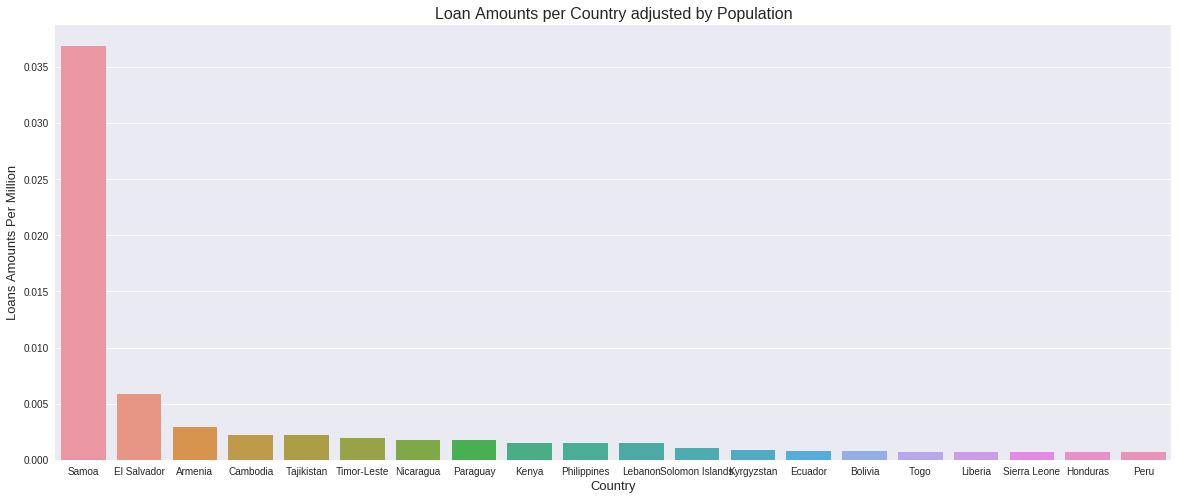

In [88]:
plt.figure(figsize=(20,8))
k_loan_pop_country_df.sort_values('loan_amount_per_million', ascending=False, inplace=True)

sns.barplot(k_loan_pop_country_df.head(20).country, k_loan_pop_country_df.head(20).loan_amount_per_million)

plt.xlabel('Country', fontsize=13)
plt.ylabel('Loans Amounts Per Million', fontsize=13)
plt.title("Loan Amounts per Country adjusted by Population", fontsize=16)

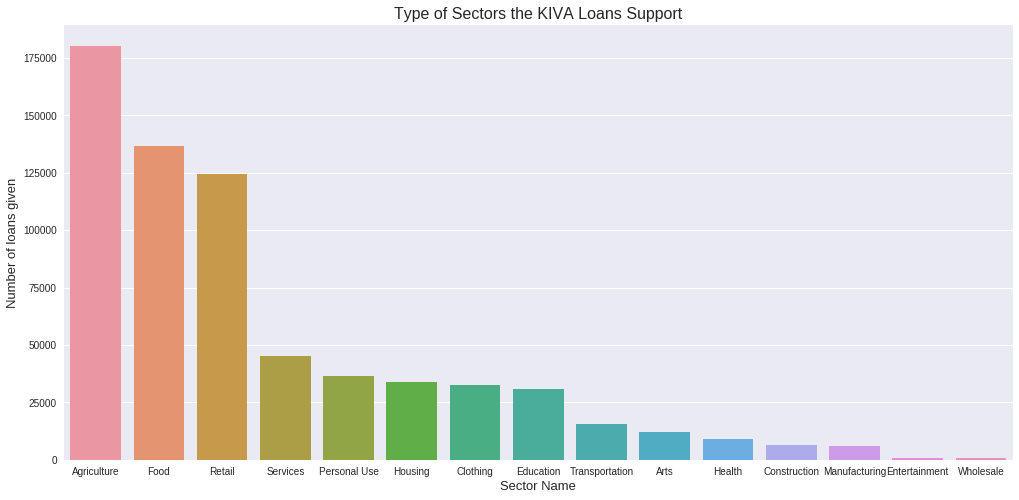

In [54]:
plt.figure(figsize=(17,8))
sector = k_loans_df['sector'].value_counts()

sns.barplot(sector.index, sector.values)
    
plt.ylabel('Number of loans given', fontsize=13)
plt.xlabel('Sector Name', fontsize=13)
plt.title("Type of Sectors the KIVA Loans Support", fontsize=16)
plt.show()

Text(0.5,1,'Sector Distribution')

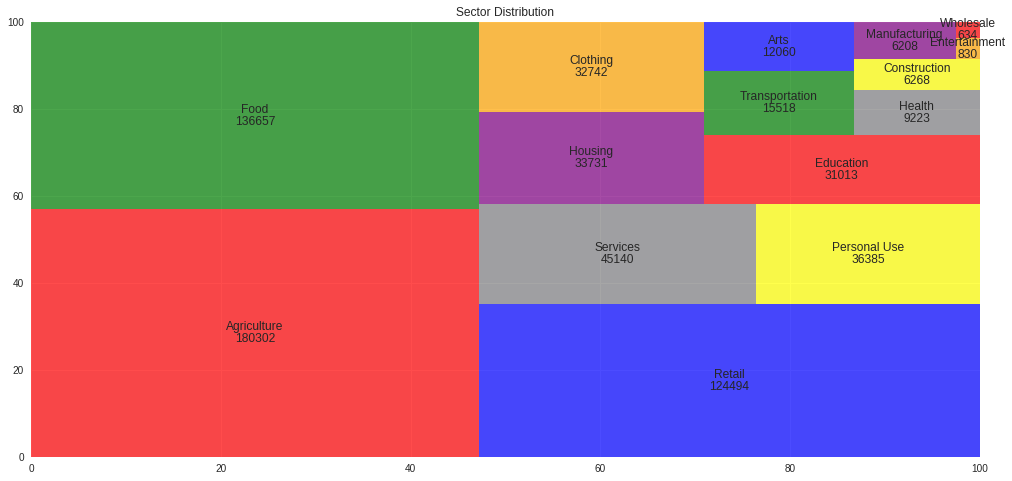

In [40]:
plt.figure(figsize=(17,8))

squarify.plot(label=sector.index, sizes=sector.values, value=sector.values, color=["red","green","blue", "grey", "yellow", "purple", 'orange'], alpha = 0.7)
plt.title('Sector Distribution')

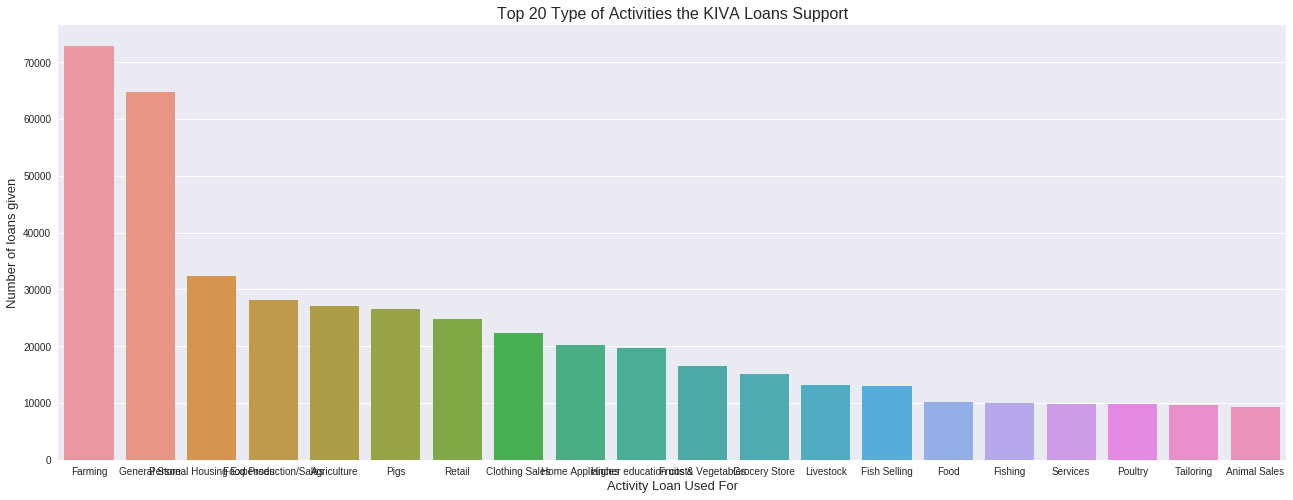

In [43]:
plt.figure(figsize=(22,8))
activity = k_loans_df['activity'].value_counts().head(20)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given', fontsize=13)
plt.xlabel('Activity Loan Used For', fontsize=13)
plt.title("Top 20 Type of Activities the KIVA Loans Support", fontsize=16)
plt.show()

Text(0.5,1,'Types of Repayment Interval for KIVA Loans')

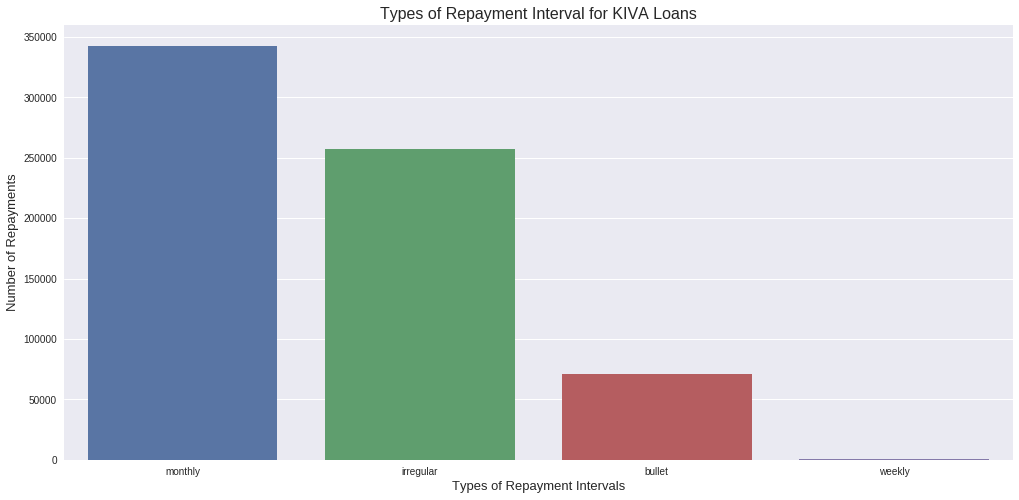

In [44]:
plt.figure(figsize=(17,8))
count = k_loans_df['repayment_interval'].value_counts()
sns.barplot(count.index, count.values)

plt.xlabel('Types of Repayment Intervals', fontsize=13)
plt.ylabel('Number of Repayments', fontsize=13)
plt.title("Types of Repayment Interval for KIVA Loans", fontsize=16)

In [47]:
fig = {
  "data": [
    {
      "values": count.values,
      "labels": count.index,
      "domain": {"x": [.30, .70]},
      "hoverinfo":"label+percent",
      "type": "pie"
    },
  ],
  "layout": {
        "title":"Types of Repayment Intervals",
            }
    }

py.iplot(fig, filename='basic_pie_chart')

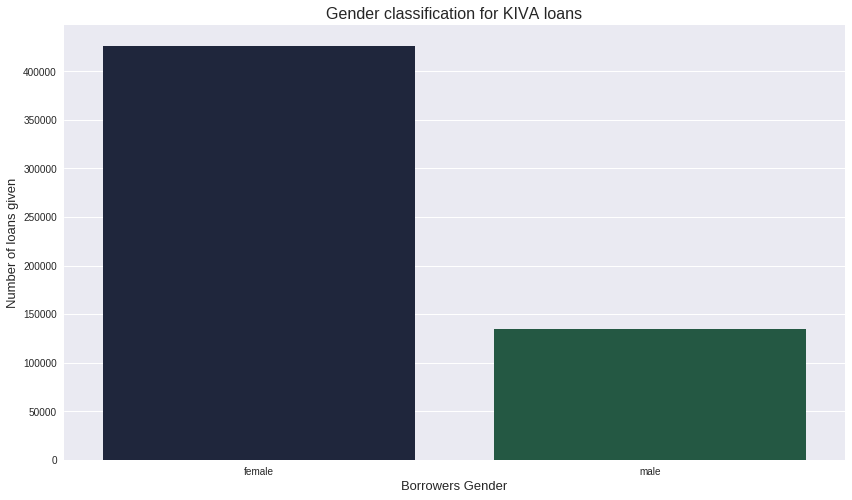

In [100]:
## Analysis of Gender for Entire Dataset
plt.figure(figsize=(14,8))
Gender_data = k_loans_df['borrower_genders'].value_counts().head(2)

sns.barplot(Gender_data.index, Gender_data.values)
    
plt.ylabel('Number of loans given', fontsize=13)
plt.xlabel('Borrowers Gender', fontsize=13)
plt.title("Gender classification for KIVA loans", fontsize=16)
plt.show()
# Result : Most loans are given to FEMALE APPLICANTS BY KIVA

In [101]:
fig2 = {
  "data": [
    {
      "values": Gender_data.values,
      "labels": Gender_data.index,
      "domain": {"x": [.30, .70]},
      "hoverinfo":"label+percent",
      "type": "pie"
    },
  ],
  "layout": {
        "title":"Gender of KIVA Loans",
            }
    }

py.iplot(fig2, filename='basic_pie_chart')

In [23]:
# Load the boston dataset for manipulation
kiva_X = k_loans_df.funded_amount.values
kiva_Y = k_loans_df.loan_amount.values
kiva_X = kiva_X.reshape(-1,1)
kiva_Y = kiva_Y.reshape(-1,1)

# Split the data into training/testing sets
kiva_X_train, kiva_X_test = train_test_split(kiva_X, test_size=0.5) 

# Split the targets into training/testing sets
kiva_y_train, kiva_y_test = train_test_split(kiva_Y, test_size=0.5) 

# Create linear regression object and train the model using the training sets
regr = linear_model.LinearRegression()
regr.fit(kiva_X_train, kiva_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Coefficients: 
 [[0.00077711]]
Mean squared error: 1393106.66
Variance score: -0.00


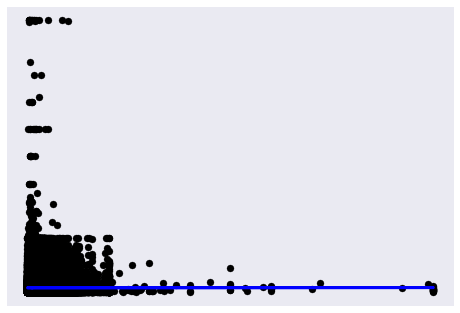

In [24]:
# Make predictions using the testing set
kiva_y_pred = regr.predict(kiva_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(kiva_y_test, kiva_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(kiva_y_test, kiva_y_pred))

# Plot outputs
plt.scatter(kiva_X_test, kiva_y_test,  color='black')
plt.plot(kiva_X_test, kiva_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

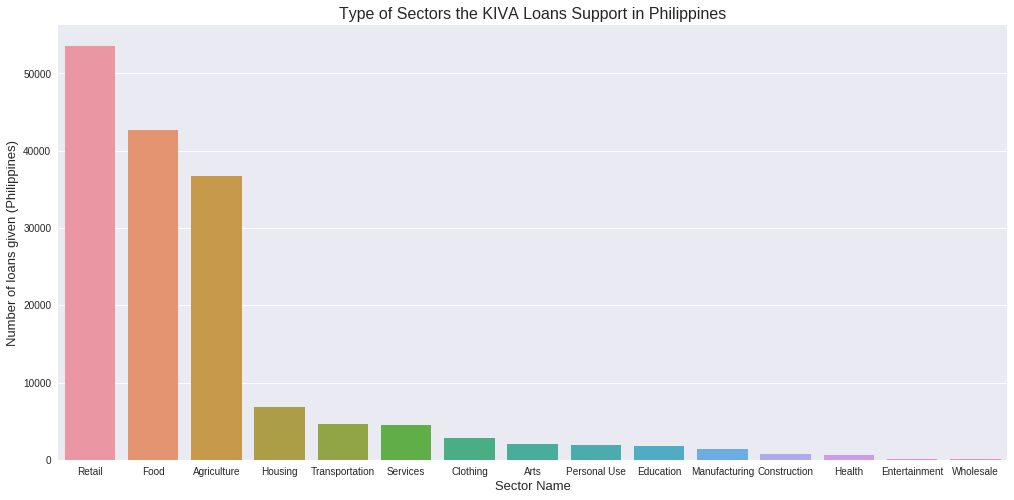

In [48]:
phil = k_loans_df[(k_loans_df.country == 'Philippines')]
phil.head(5)

plt.figure(figsize=(17,8))
sector = phil['sector'].value_counts()

sns.barplot(sector.index, sector.values)
    
plt.ylabel('Number of loans given (Philippines)', fontsize=13)
plt.xlabel('Sector Name', fontsize=13)
plt.title("Type of Sectors the KIVA Loans Support in Philippines", fontsize=16)
plt.show()

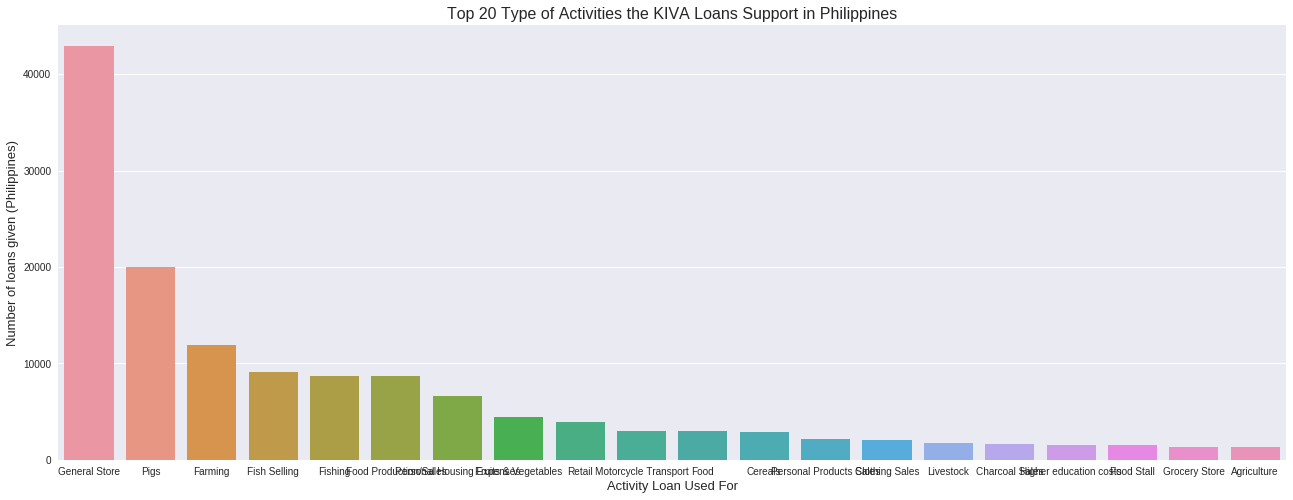

In [49]:
plt.figure(figsize=(22,8))
activity = phil['activity'].value_counts().head(20)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given (Philippines)', fontsize=13)
plt.xlabel('Activity Loan Used For', fontsize=13)
plt.title("Top 20 Type of Activities the KIVA Loans Support in Philippines", fontsize=16)
plt.show()

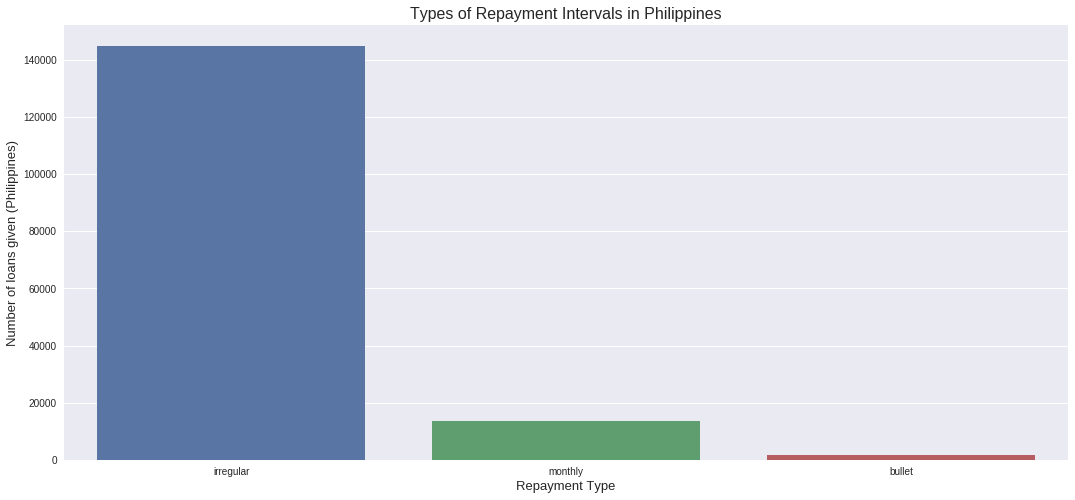

In [27]:
plt.figure(figsize=(18,8))
activity = phil['repayment_interval'].value_counts().head(20)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given (Philippines)', fontsize=13)
plt.xlabel('Repayment Type', fontsize=13)
plt.title("Types of Repayment Intervals in Philippines", fontsize=16)
plt.show()

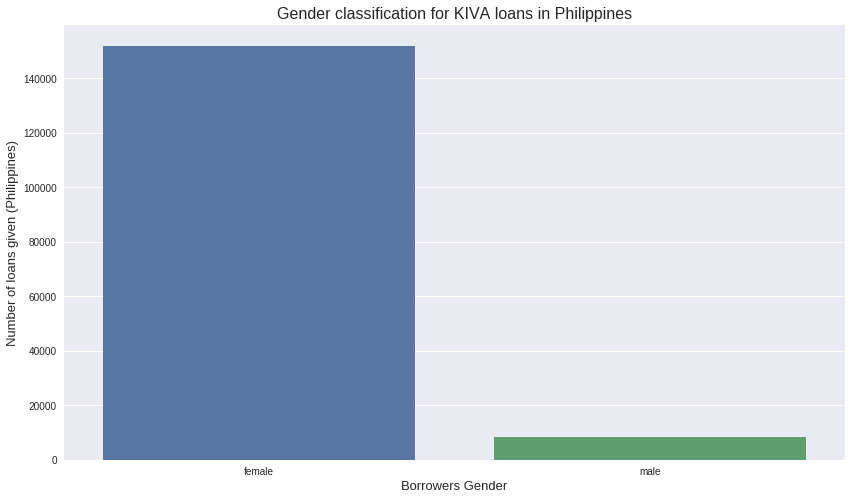

In [24]:
plt.figure(figsize=(14,8))
Gender = phil['borrower_genders'].value_counts()

sns.barplot(Gender.index, Gender.values)
    
plt.ylabel('Number of loans given (Philippines)', fontsize=13)
plt.xlabel('Borrowers Gender', fontsize=13)
plt.title("Gender classification for KIVA loans in Philippines", fontsize=16)
plt.show()

In [26]:
retail = phil[(phil.sector == 'Retail')]
retail.head(5)

id  funded_amount  loan_amount       activity  sector  \
55  653123          700.0        700.0  General Store  Retail   
65  653242          325.0        325.0  General Store  Retail   
71  653108          125.0        125.0  General Store  Retail   
91  653335          350.0        350.0  General Store  Retail   
96  653107          325.0        325.0  General Store  Retail   

                                                  use country_code  \
55  to buy additional items like eggs, charcoal, r...           PH   
65  to purchase sugar, coffee, coffee creamer, can...           PH   
71                              to buy goods to sell.           PH   
91                to buy additional groceries to sell           PH   
96  to buy additional stocks for her sari-sari store.           PH   

        country                                        region currency  \
55  Philippines                        Brookes Point, Palawan      PHP   
65  Philippines               Sinippil, Cauayan City, Isabela      PHP   
71  Philippines  Pagadian - Lower Bagong Silang Pagadian City      PHP   
91  Philippines                       Tanjay, Negros Oriental      PHP   
96  Philippines                              Plaridel-Cebulin      PHP   

    partner_id                posted_time             disbursed_time  \
55       145.0  2014-01-02 02:18:02+00:00  2013-12-10 08:00:00+00:00   
65       123.0  2014-01-02 09:13:05+00:00  2013-12-13 08:00:00+00:00   
71       126.0  2014-01-02 01:01:40+00:00  2013-12-16 08:00:00+00:00   
91       145.0  2014-01-02 13:33:43+00:00  2013-12-10 08:00:00+00:00   
96       126.0  2014-01-02 01:01:10+00:00  2013-12-03 08:00:00+00:00   

                  funded_time  term_in_months  lender_count  \
55  2014-01-02 03:26:10+00:00             5.0             2   
65  2014-01-02 17:50:06+00:00             7.0            11   
71  2014-01-02 03:07:34+00:00             8.0             5   
91  2014-01-02 23:38:46+00:00            14.0            11   
96  2014-01-02 14:24:58+00:00            11.0            10   

                                             tags borrower_genders  \
55                                            NaN           female   
65                                 volunteer_pick           female   
71  #Woman Owned Biz, #Parent, #Interesting Photo           female   
91                                            NaN           female   
96         #Elderly, #Schooling, #Woman Owned Biz           female   

   repayment_interval        date  
55          irregular  2014-01-02  
65          irregular  2014-01-02  
71          irregular  2014-01-02  
91          irregular  2014-01-02  
96          irregular  2014-01-02

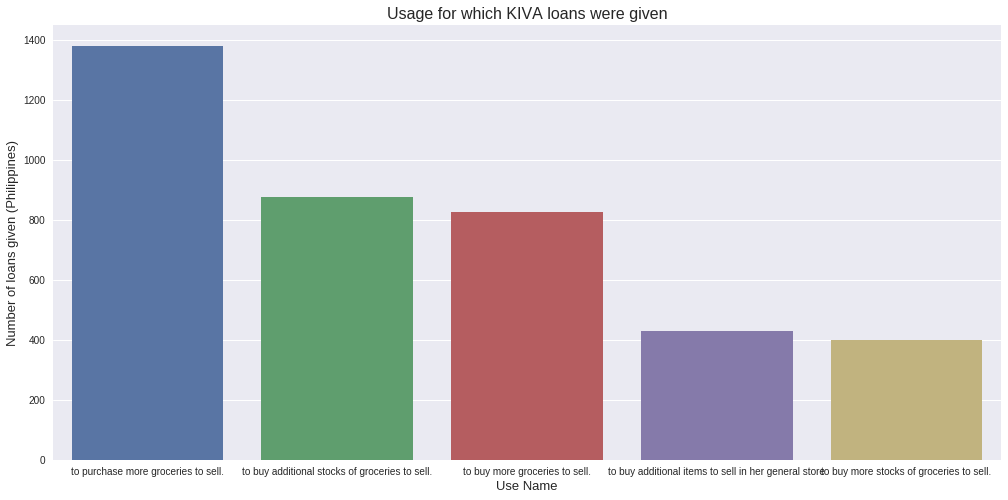

In [27]:
plt.figure(figsize=(17,8))
use = retail['use'].value_counts().head(5)

sns.barplot(use.index, use.values)
    
plt.ylabel('Number of loans given (Philippines)', fontsize=13)
plt.xlabel('Use Name', fontsize=13)
plt.title("Usage for which KIVA loans were given", fontsize=16)
plt.show()
# Maximum use is for buying groceries in Retail to sell in Philipines

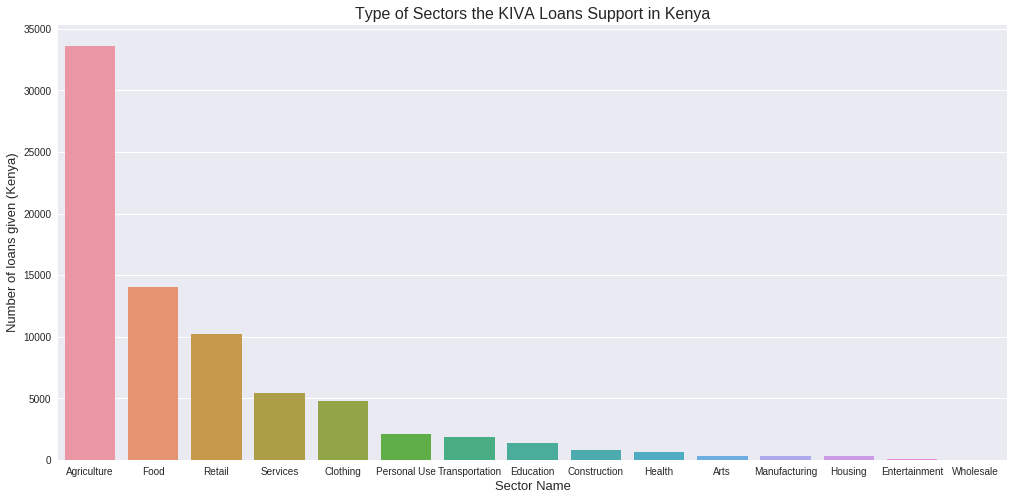

In [51]:
kenya = k_loans_df[(k_loans_df.country == 'Kenya')]
kenya.head(5)
plt.figure(figsize=(17,8))
sector = kenya['sector'].value_counts()

sns.barplot(sector.index, sector.values)
    
plt.ylabel('Number of loans given (Kenya)', fontsize=13)
plt.xlabel('Sector Name', fontsize=13)
plt.title("Type of Sectors the KIVA Loans Support in Kenya", fontsize=16)
plt.show()
# In kevya : Agricultural sector is granted highest no. of loans 

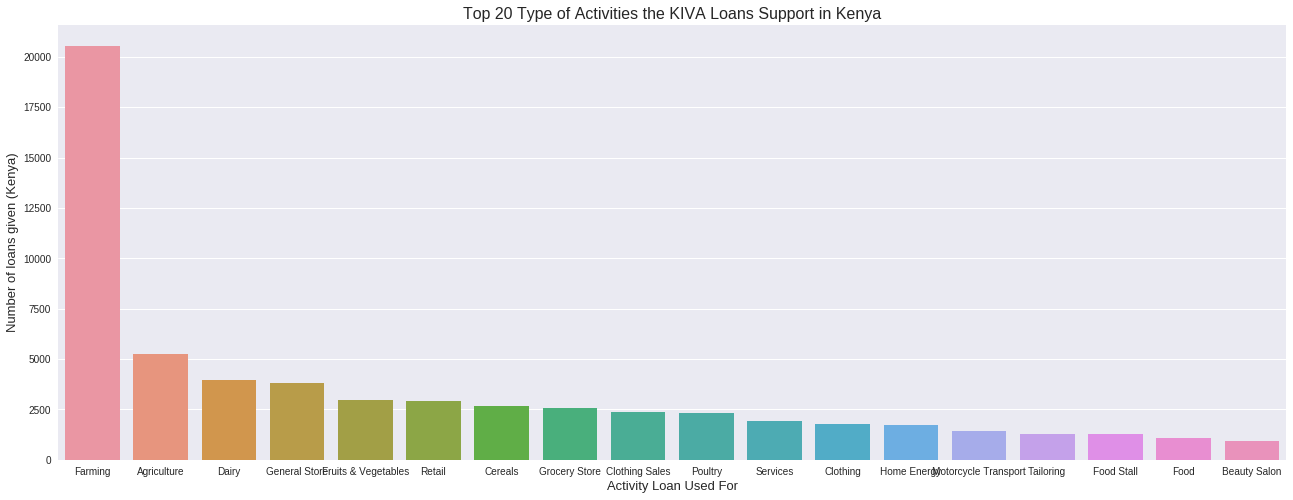

In [52]:
plt.figure(figsize=(22,8))
activity = kenya['activity'].value_counts().head(18)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given (Kenya)', fontsize=13)
plt.xlabel('Activity Loan Used For', fontsize=13)
plt.title("Top 20 Type of Activities the KIVA Loans Support in Kenya", fontsize=16)
plt.show()
# In kevya : Farming is the most popular activity getting loan sanctioned

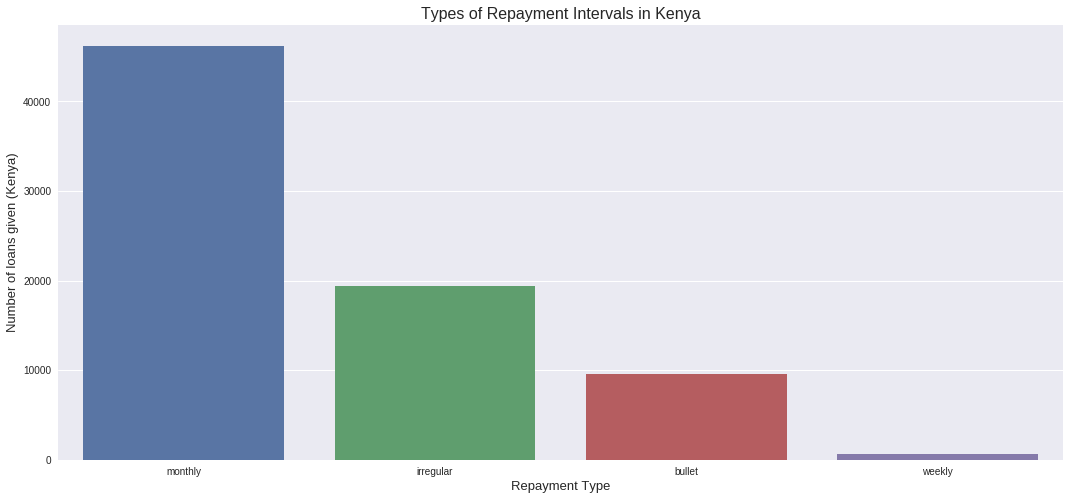

In [30]:
plt.figure(figsize=(18,8))
activity = kenya['repayment_interval'].value_counts().head(20)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given (Kenya)', fontsize=13)
plt.xlabel('Repayment Type', fontsize=13)
plt.title("Types of Repayment Intervals in Kenya", fontsize=16)
plt.show()
# Monthly Repayment Option is prefered in Kenya

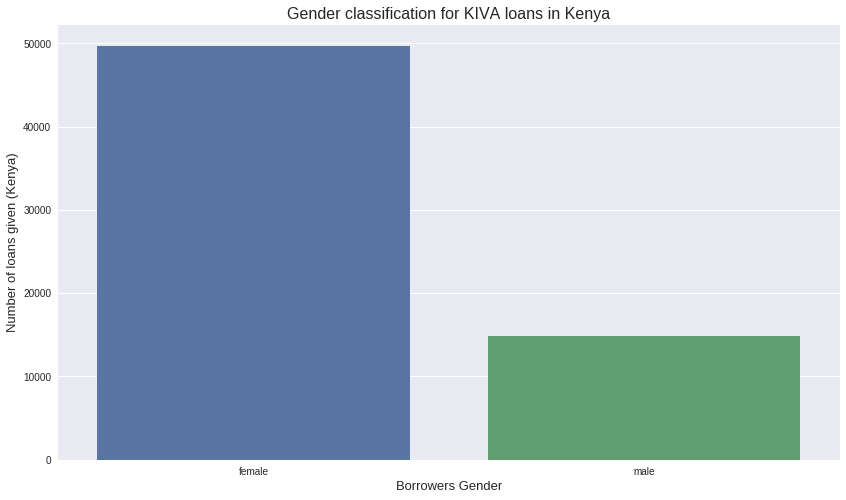

In [31]:
plt.figure(figsize=(14,8))
Gender = kenya['borrower_genders'].value_counts().head(2)

sns.barplot(Gender.index, Gender.values)
    
plt.ylabel('Number of loans given (Kenya)', fontsize=13)
plt.xlabel('Borrowers Gender', fontsize=13)
plt.title("Gender classification for KIVA loans in Kenya", fontsize=16)
plt.show()
# Females are granted most loans in Kenya

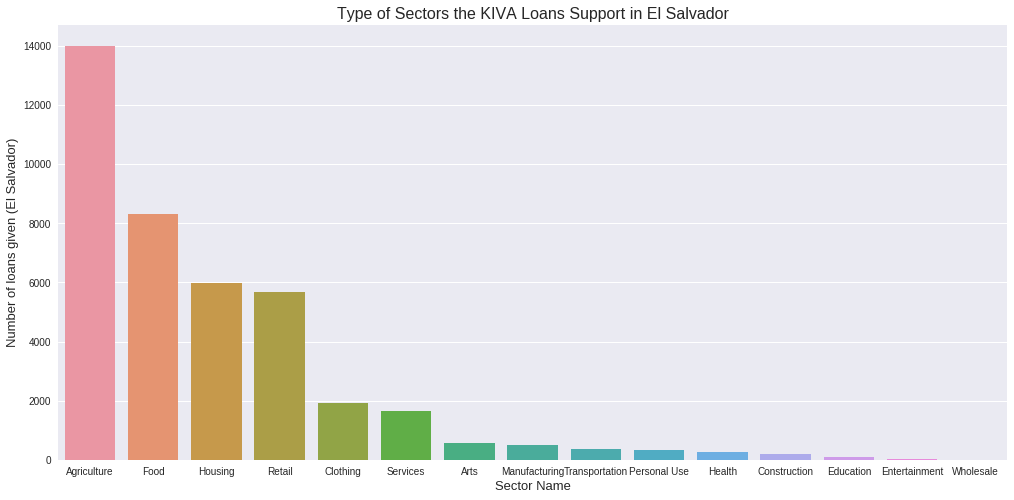

In [50]:
El_Salvador = k_loans_df[(k_loans_df.country == 'El Salvador')]
El_Salvador.head(5)
plt.figure(figsize=(17,8))
sector = El_Salvador['sector'].value_counts()

sns.barplot(sector.index, sector.values)
    
plt.ylabel('Number of loans given (El Salvador)', fontsize=13)
plt.xlabel('Sector Name', fontsize=13)
plt.title("Type of Sectors the KIVA Loans Support in El Salvador", fontsize=16)
plt.show()
# In El_Salvador : Agriculture is popular Sector for loan applications

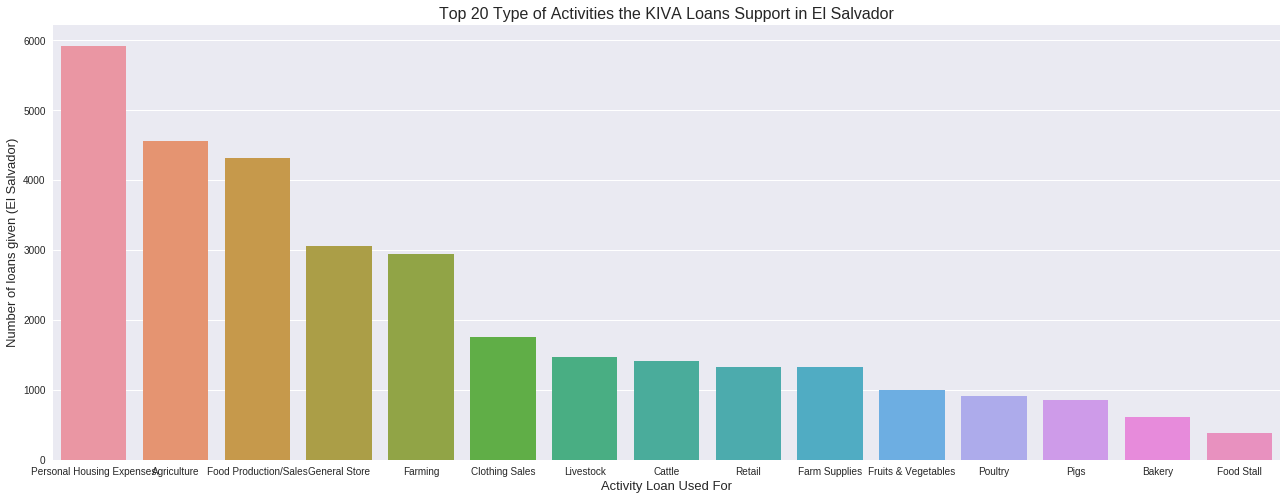

In [53]:
plt.figure(figsize=(22,8))
activity = El_Salvador['activity'].value_counts().head(15)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given (El Salvador)', fontsize=13)
plt.xlabel('Activity Loan Used For', fontsize=13)
plt.title("Top 20 Type of Activities the KIVA Loans Support in El Salvador", fontsize=16)
plt.show()
# In El_Salvador : Personal Housing Expenses is the famous activity for Loans 

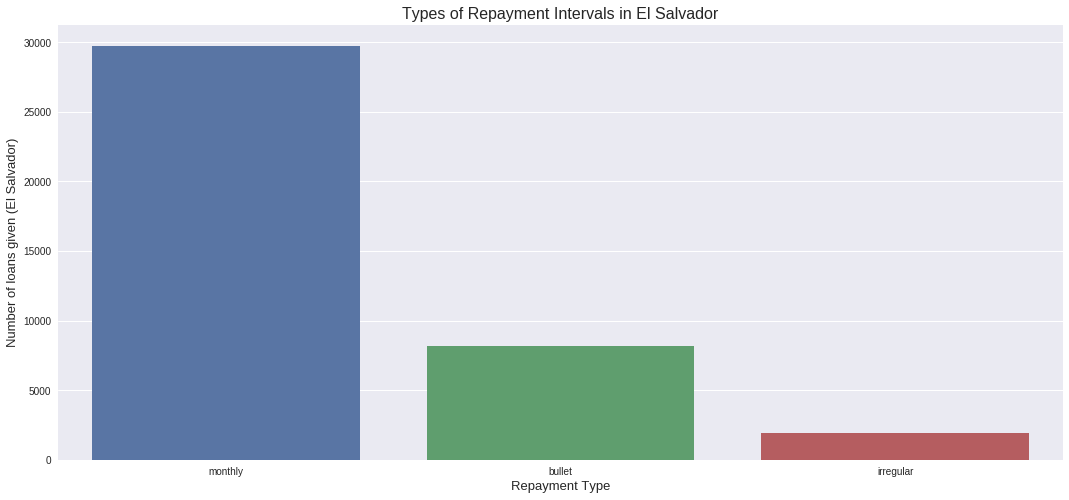

In [34]:
plt.figure(figsize=(18,8))
activity = El_Salvador['repayment_interval'].value_counts().head(20)

sns.barplot(activity.index, activity.values)
    
plt.ylabel('Number of loans given (El Salvador)', fontsize=13)
plt.xlabel('Repayment Type', fontsize=13)
plt.title("Types of Repayment Intervals in El Salvador", fontsize=16)
plt.show()
# Monthly Repayment option is preferred in El_Salvador

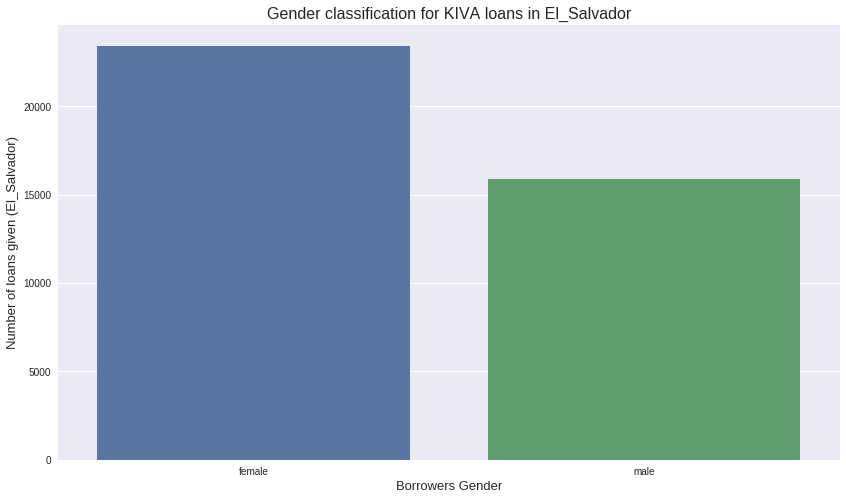

In [35]:
plt.figure(figsize=(14,8))
Gender = El_Salvador['borrower_genders'].value_counts().head(2)

sns.barplot(Gender.index, Gender.values)
    
plt.ylabel('Number of loans given (El_Salvador)', fontsize=13)
plt.xlabel('Borrowers Gender', fontsize=13)
plt.title("Gender classification for KIVA loans in El_Salvador", fontsize=16)
plt.show()
# Females are granted most loans in El_Salvador

In [0]:
downloaded = drive.CreateFile({'id':'1VyLV-uSGacf1jSPHRHpnvZPIa7RvRY9k'}) # Loan information
downloaded.GetContentFile('loans.csv')  
loansDF = pd.read_csv('loans.csv', nrows=500000) 

In [0]:

#list(np.unique(loansDF.country_name))
encoder = preprocessing.LabelEncoder()
loansDF['status_cat'] =encoder.fit_transform(loansDF['status'])
loansDF['sector_cat'] =encoder.fit_transform(loansDF['sector'])
loansDF['repayment_interval_cat'] =encoder.fit_transform(loansDF['repayment_interval'])

In [20]:
print(list(np.unique(loansDF.status)))
print(list(np.unique(loansDF.status_cat)))

['expired', 'fundRaising', 'funded', 'refunded']
[0, 1, 2, 3]


estimatedCoef
features                             
lender_count                 0.012921
loan_amount                 -0.000418
repayment_interval_cat      -0.001332
sector_cat                  -0.003019
term_in_months              -0.006777

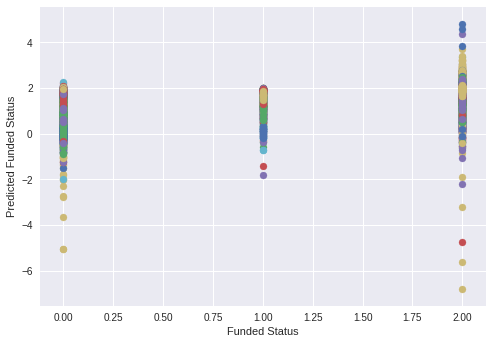

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
lstdf = []
for c in list(np.unique(loansDF.country_name)):
    
#analysis looking at funded_amount, loan_amount
    loansDFSub = loansDF[loansDF.country_name == c][['status_cat','loan_amount','sector_cat','term_in_months','lender_count','borrower_genders','repayment_interval_cat']]
    loansDFSub.dropna( inplace=True)
    if len(loansDFSub) > 10:
        # ['status','loan_amount','sector','country_code','term_in_months','lender_count','borrower_genders','repayment_interval_cat']
        
        
        smp = np.random.rand(len(loansDFSub)) <= 0.5
        #dependent variable is Status
        df_Test = loansDFSub[smp][['loan_amount', 'sector_cat', 'term_in_months','lender_count','repayment_interval_cat']]
        df_Train = loansDFSub[~smp][['loan_amount', 'sector_cat', 'term_in_months','lender_count','repayment_interval_cat']]
        X_train = loansDFSub[~smp]['status_cat']
        X_test = loansDFSub[smp]['status_cat']
        lm = LinearRegression(fit_intercept=True)
        model = lm.fit(df_Train,X_train)    
        
        
        pred = model.predict(df_Test)    
        plt.scatter(X_test, pred)
        plt.xlabel("Funded Status")
        plt.ylabel("Predicted Funded Status")
        lstdf.append(pd.DataFrame(list(zip(df_Train.columns, model.coef_)), columns=['features','estimatedCoef']))
        
finaldf = pd.concat(lstdf)
finaldf.groupby(['features']).mean()